In [1]:
from gptopt.optim.pdhg import *
from gptopt.optim.least_squares import *
from utils_pdhg import *

/mnt/home/tparshakova/Documents/GPT-opt/venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch

from gptopt.utils import set_seed
set_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Minimize $\|\mathcal{A}^*(Y) + G\|_F^2$

In [3]:
for (m, n) in [(30, 60), (60, 30), (60, 60)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=True)

        Y1, res1 = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="kron")
        Y2, res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=1000, diag_scaling=True, debug=True)
        Y3, res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=1000, diag_scaling=False, debug=True)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}")

30x60
Kron 6.3763e-05, LSQR DS 1.8358e-06, LSQR no DS 1.9882e-06
Kron 1.4706e-05, LSQR DS 1.7337e-06, LSQR no DS 1.8121e-06
Kron 8.8408e-05, LSQR DS 1.8731e-06, LSQR no DS 1.9841e-06
Kron 1.7791e-05, LSQR DS 1.9446e-06, LSQR no DS 1.9250e-06
Kron 4.0329e-05, LSQR DS 1.8238e-06, LSQR no DS 1.7025e-06
60x30
Kron 5.8231e-07, LSQR DS 1.4185e-06, LSQR no DS 1.1977e-06
Kron 6.2372e-07, LSQR DS 1.0707e-06, LSQR no DS 1.0609e-06
Kron 5.6742e-07, LSQR DS 1.0637e-06, LSQR no DS 1.6305e-06
Kron 6.4442e-07, LSQR DS 1.5859e-06, LSQR no DS 1.5125e-06
Kron 5.7665e-07, LSQR DS 1.2285e-06, LSQR no DS 1.5153e-06
60x60
Kron 2.2993e-06, LSQR DS 1.7418e-06, LSQR no DS 1.7684e-06
Kron 1.8416e-06, LSQR DS 1.7575e-06, LSQR no DS 1.7294e-06
Kron 2.8429e-06, LSQR DS 1.8585e-06, LSQR no DS 1.8008e-06
Kron 2.2506e-06, LSQR DS 1.7856e-06, LSQR no DS 1.8275e-06
Kron 1.9385e-06, LSQR DS 1.7821e-06, LSQR no DS 1.7577e-06


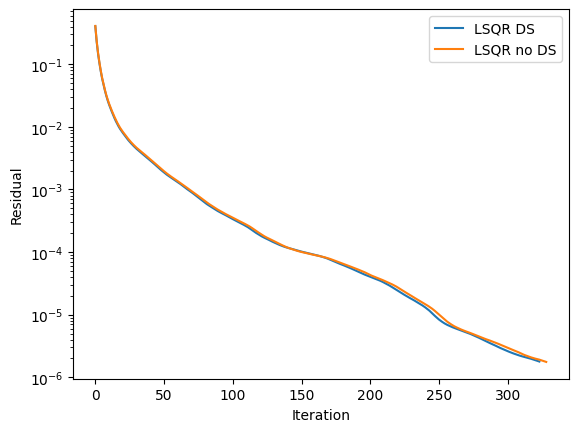

In [4]:
plt.plot(res2['loss'], label='LSQR DS')
plt.plot(res3['loss'], label='LSQR no DS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()

In [5]:
for (m, n) in [(50, 50)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=False)

        Y1, res1 = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="kron")
        Y2, res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=100, diag_scaling=True)
        Y3, res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=100, diag_scaling=False)
        assert res2["res"] == res2["loss"][-1] and res3["res"] == res3["loss"][-1]
        Y4, res4 = cvxpy_Y_sylvester_solve(A1=B, A2=A, G1=G1, G2=G2)
        assert np.allclose(res1['res'], res4['res'], atol=1e-6)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, CVXPY {res4['res']:.4e}")

50x50
Kron 7.0426e-01, LSQR DS 7.0433e-01, LSQR no DS 7.0433e-01, CVXPY 7.0426e-01
Kron 7.0828e-01, LSQR DS 7.0828e-01, LSQR no DS 7.0828e-01, CVXPY 7.0828e-01
Kron 7.0789e-01, LSQR DS 7.0790e-01, LSQR no DS 7.0790e-01, CVXPY 7.0789e-01
Kron 7.0239e-01, LSQR DS 7.0242e-01, LSQR no DS 7.0242e-01, CVXPY 7.0239e-01
Kron 7.1612e-01, LSQR DS 7.1724e-01, LSQR no DS 7.1726e-01, CVXPY 7.1612e-01


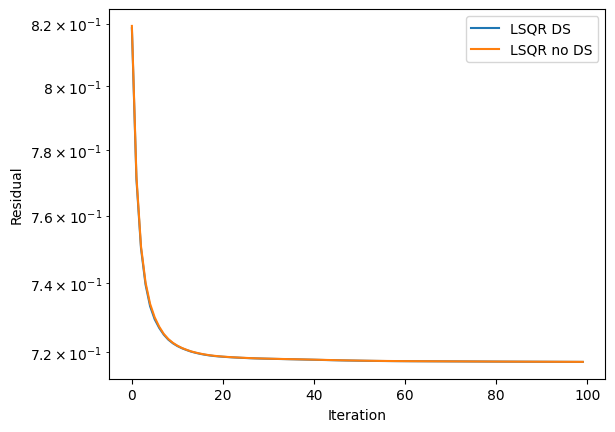

In [6]:
plt.plot(res2['loss'], label='LSQR DS')
plt.plot(res3['loss'], label='LSQR no DS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()

In [7]:
sizes = [(30, 60), (60, 30), (60, 60)]
trials = 3
sync = torch.cuda.synchronize if torch.cuda.is_available() else (lambda: None)

for (m, n) in sizes:
    print(f"\nSize {m}x{n}")
    for t in range(1, trials + 1):
        # Structured instance so a dual-feasible Y exists
        A, B, G1, G2, *_ = gaussian_data(m, n, std1=1.0, std2=0.1, rank_ratio=0.5, G_in_range=True)
 
        # Force CG branch by keeping max_kron small
        sync(); t0 = time.time()
        _, res_dp  = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=10000, diag_scaling=True)
        sync(); t1 = time.time()

        sync(); t2 = time.time()
        _, res_ns = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Y", tol=1e-10, maxit=10000, diag_scaling=False)
        sync(); t3 = time.time()

        print(f"trial {t}: diag res={res_dp['res']:.4e}, time={(t1-t0)*1e3:.1f}ms | "
              f"no-scale res={res_ns['res']:.4e}, time={(t3-t2)*1e3:.1f}ms")


Size 30x60
trial 1: diag res=2.0077e-06, time=29.6ms | no-scale res=1.8175e-06, time=26.1ms
trial 2: diag res=1.5423e-06, time=25.4ms | no-scale res=1.7402e-06, time=24.2ms
trial 3: diag res=1.8040e-06, time=25.8ms | no-scale res=1.7091e-06, time=25.4ms

Size 60x30
trial 1: diag res=1.1487e-06, time=18.3ms | no-scale res=1.4034e-06, time=17.9ms
trial 2: diag res=1.2590e-06, time=18.3ms | no-scale res=1.1886e-06, time=17.8ms
trial 3: diag res=1.6421e-06, time=17.1ms | no-scale res=1.3949e-06, time=17.3ms

Size 60x60
trial 1: diag res=1.7800e-06, time=268.0ms | no-scale res=1.7637e-06, time=281.5ms
trial 2: diag res=1.7658e-06, time=207.3ms | no-scale res=1.7511e-06, time=205.5ms
trial 3: diag res=1.7479e-06, time=183.3ms | no-scale res=1.7700e-06, time=189.2ms


# Minimize $\|\mathcal{A}(Z) +\beta \mathbf{sign}(Y^0)\|_F^2$, where  $\mathcal{A}(Z) = Z_1^\top A_1 + A_2^\top Z_2$

In [9]:
beta = 0.1
for (m, n) in [(10, 10), (30, 30), (40, 40)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=True)

        Y0, _ = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="lsqr")

        Z1_1, Z2_1, res1 = Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta, method="kron", tol=1e-10)
        (Z1_2, Z2_2), res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=200, diag_scaling=True)
        (Z1_3, Z2_3), res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=200, diag_scaling=False)
        Z1_4, Z2_4, res4 = cvxpy_Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta)
        # assert np.allclose(res1['res'], res4['res'], atol=1e-6)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, CVXPY {res4['res']:.4e}")

10x10
Kron 1.7159e-05, LSQR DS 1.6039e-06, LSQR no DS 1.8902e-06, CVXPY 1.1254e-14
Kron 5.8089e-06, LSQR DS 1.7991e-06, LSQR no DS 1.9785e-06, CVXPY 1.9588e-15
Kron 4.7154e-06, LSQR DS 1.8341e-06, LSQR no DS 1.0420e-06, CVXPY 1.9375e-15
Kron 3.7670e-06, LSQR DS 1.3132e-06, LSQR no DS 1.4107e-06, CVXPY 1.3406e-15
Kron 2.3952e-06, LSQR DS 1.6034e-06, LSQR no DS 1.6634e-06, CVXPY 9.3816e-16
30x30
Kron 7.2016e-05, LSQR DS 3.9933e-06, LSQR no DS 8.2152e-06, CVXPY 1.3562e-14
Kron 2.6605e-05, LSQR DS 8.3183e-04, LSQR no DS 1.3169e-03, CVXPY 1.1986e-13
Kron 1.4406e-05, LSQR DS 3.3075e-06, LSQR no DS 5.4856e-06, CVXPY 7.4398e-15
Kron 6.3456e-05, LSQR DS 3.3621e-05, LSQR no DS 4.2392e-05, CVXPY 2.6018e-14
Kron 1.0291e-04, LSQR DS 1.3584e-06, LSQR no DS 1.3592e-06, CVXPY 6.7380e-15
40x40
Kron 3.8776e-05, LSQR DS 4.9218e-05, LSQR no DS 9.2066e-05, CVXPY 2.6707e-14
Kron 5.0547e-05, LSQR DS 7.5151e-05, LSQR no DS 9.4676e-05, CVXPY 1.1865e-14
Kron 8.0413e-05, LSQR DS 1.6329e-03, LSQR no DS 1.7303e-03

In [10]:
beta = 0.1
for (m, n) in [(10, 10), (30, 30), (40, 40)]:
    print(f"{m}x{n}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 0.5
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=False)

        Y0, _ = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="lsqr")

        Z1_1, Z2_1, res1 = Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta, method="kron", tol=1e-10)
        (Z1_2, Z2_2), res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=200, diag_scaling=True)
        (Z1_3, Z2_3), res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=200, diag_scaling=False)
        Z1_4, Z2_4, res4 = cvxpy_Z_sylvester_solve(A1=B, A2=A, Y0=Y0, beta=beta)
        # assert np.allclose(res1['res'], res4['res'], atol=1e-6)
        print(f"Kron {res1['res']:.4e}, LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, CVXPY {res4['res']:.4e}")

10x10
Kron 3.1072e-05, LSQR DS 1.9094e-06, LSQR no DS 1.7626e-06, CVXPY 3.1177e-14
Kron 7.4726e-05, LSQR DS 1.8759e-06, LSQR no DS 1.9419e-06, CVXPY 2.7940e-14
Kron 3.1296e-05, LSQR DS 2.1745e-06, LSQR no DS 2.6576e-06, CVXPY 6.2156e-14
Kron 1.6716e-05, LSQR DS 1.5312e-06, LSQR no DS 1.7748e-06, CVXPY 1.0685e-14
Kron 1.7569e-05, LSQR DS 1.8808e-06, LSQR no DS 1.7383e-06, CVXPY 3.1272e-14
30x30
Kron 3.5336e-04, LSQR DS 1.8064e-05, LSQR no DS 4.0400e-05, CVXPY 7.0863e-14
Kron 1.4019e-04, LSQR DS 2.9530e-05, LSQR no DS 4.7069e-05, CVXPY 1.2414e-13
Kron 5.2002e-04, LSQR DS 2.8016e-02, LSQR no DS 3.2162e-02, CVXPY 8.1289e-13
Kron 2.4992e-04, LSQR DS 1.6827e-05, LSQR no DS 2.4577e-05, CVXPY 8.8271e-14
Kron 2.0340e-04, LSQR DS 3.2194e-05, LSQR no DS 1.0630e-04, CVXPY 1.0887e-13
40x40
Kron 3.1704e-04, LSQR DS 1.9757e-03, LSQR no DS 3.1531e-03, CVXPY 4.7429e-13
Kron 2.2349e-03, LSQR DS 1.9559e-03, LSQR no DS 3.0868e-03, CVXPY 4.3973e-13
Kron 1.1878e-03, LSQR DS 3.0827e-04, LSQR no DS 3.7336e-04

In [15]:
beta = 0.1
for (m, n, G_in_range) in [(500, 500, True), (500, 500, False)]:
    print(f"{m}x{n}, {G_in_range=}")
    for _ in range(5): 
        std2 = 0.1
        std1 = 1
        rank_ratio = 1
        A, B, G1, G2, A_np, B_np, G1_np, G2_np, lamb_max = gaussian_data(m, n, std1=std1, std2=std2, 
                                                                 rank_ratio=rank_ratio, G_in_range=G_in_range)

        Y0, y_res = Y_dual_feasible(A1=B, A2=A, G1=G1, G2=G2, method="lsqr")
 
        (Z1_2, Z2_2), res2 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=500, diag_scaling=True)
        (Z1_3, Z2_3), res3 = attn_least_squares_solve(A1=B, A2=A, G1=G1, G2=G2, X_type="Z", Y0=Y0, beta=beta, tol=1e-10, maxit=500, diag_scaling=False)
        
        print(f"LSQR DS {res2['res']:.4e}, LSQR no DS {res3['res']:.4e}, Y res{y_res['res']:.4e}")

500x500, G_in_range=True
LSQR DS 2.7951e-03, LSQR no DS 2.7983e-03, Y res4.5595e-06
LSQR DS 3.6995e-03, LSQR no DS 3.7102e-03, Y res6.0314e-06
LSQR DS 3.4319e-03, LSQR no DS 3.4436e-03, Y res3.5013e-06
LSQR DS 2.4709e-03, LSQR no DS 2.4783e-03, Y res4.0213e-06
LSQR DS 2.4738e-03, LSQR no DS 2.4777e-03, Y res4.5504e-06
500x500, G_in_range=False
LSQR DS 1.3761e-01, LSQR no DS 1.3793e-01, Y res7.0751e-01
LSQR DS 1.2518e-01, LSQR no DS 1.2551e-01, Y res7.0672e-01
LSQR DS 1.8464e-01, LSQR no DS 1.8496e-01, Y res7.0715e-01
LSQR DS 1.5305e-01, LSQR no DS 1.5383e-01, Y res7.0705e-01
LSQR DS 9.5506e-02, LSQR no DS 9.5632e-02, Y res7.0579e-01


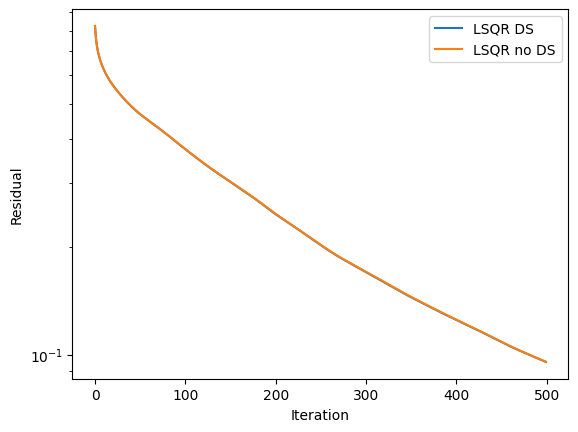

In [16]:
plt.plot(res2['loss'], label='LSQR DS')
plt.plot(res3['loss'], label='LSQR no DS')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()